## <span style="color:blue">Computer Vision - Fall 2021


**Lecturer:** Prof. Yael Moses, IDC

**TA:** Eyal Friedman, IDC

**Sybmission date: 3.12.2020**\
Note: in case you need an extenstion for any reason - you can submit it by 7.12.21.
No extra extensions will be given.

## <span style="color:blue">Exercise 2  </span>

In this exercise you will practice working with geometric tools for analyzing 3D scenes from 2D images.
In particular, computing projection matrices, epipolar geometry, and stereo matching.

## Submission guidelines:

1. Your **zip** should include the following files only:
    - ex2.ipynb  (**Or**  ex2.py for students who refuses to work with Jupiter Notebook). 
    - ex2_ID_ID.pdf (If you decieded not to answer on some of the questions in the notebook, you should submit it as a pdf file). 
   (Don't add the python code to that file.)
4. You may use any IDE as you want (Spyder, Jupyter Notebook, Pycharm, ect.).
5. Name the zip file **'ex2_ID_ID.zip'** and **do not** include any additional directories. 
6. Submit using *moodle*.
7. Submit on time!
8. You can submit this assignment in pairs (no triplets)
- **Important - if you submit in pairs, one should submit the howework and the other should submit a simple text file named: ID_ID.txt and nothing else.**

## Read the following instructions carefully:
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests, unless requested.
3. Use `python 3` and `numpy 1.18.5`. Changes of the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden, unless been provided by us.
4. Your code must run without errors. Note,  **code that fails to  run will not be graded.**
5. Document your code properly.

## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the Web. However, if  you do so, then you will not learn what you should learn from it. In addition, since we  grade  the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solves the task. 
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers. 
Remember – you take this course in order to learn.


In [1]:
import cv2
# This opens an inteactive figure - use it in part B
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import null_space

# This specifies the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [2]:
%matplotlib inline

In [3]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.9.7
Numpy version:  1.21.4


In [4]:
np.set_printoptions(suppress=True)

## Section A: Projection

**In this part you will go over projection matrix,  and use them to project 3D points to an image.**



Fill the missing values, given partial values of the parameters of the left and right cameras.

\
**Right image parameters:**

The projection matrix of the right image:

In [5]:
MR = np.array([[1100.504780,          0,   331.023000,   0],
               [0,          1097.763735,   259.386377,   0],
               [0,                    0,            1,   0]])

The rotation matrix of the right image:

In [6]:
RR = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])

The focal length of the right image:

In [7]:
fR = 1.0

From here on, replace "none" with your answers to the questions. In addition, if there are more than a single possible solution, choose one.
Compute the right image center (principal point):


In [8]:
OxR = MR[0,2]
OyR = MR[1,2]

Compute the right image scale factor which is consistent with MR:

In [9]:
SxR = MR[0,0] / fR
SyR = MR[1,1] / fR

Compute the right image intrinsic matrix which is consistent with MR:

In [10]:
MintR = MR[:,:-1]  # Same coordinate system

 
**Left image parameters**
 
Left image center (principal point):

In [11]:
OxL = 320.798101
OyL = 236.431326

Scale factor:

In [12]:
SxL = 1095.671499
SyL = 1094.559584 

Focal length of the left image: 

In [13]:
fL = 1

Translation vector w.r.t. the world origin:

In [14]:
TL = -np.array([[178.2218,18.8171,-13.7744]]).T

Rotation matrix of the left image:

In [15]:
RL = np.array([[ 0.9891,    0.0602,   -0.1346],
               [-0.0590,    0.9982,    0.0134],
               [0.1351,   -0.0053,    0.9908]])

Compute the intrinsic projection matrix of the left camera: 

In [16]:
MintL = np.array([[fL * SxL, 0, OxL,0],
                  [0, fL * SyL, OyL,0],
                  [0,0,1,0]])
MintL

array([[1095.671499,    0.      ,  320.798101,    0.      ],
       [   0.      , 1094.559584,  236.431326,    0.      ],
       [   0.      ,    0.      ,    1.      ,    0.      ]])

Compute the projection matrix of the left camera

In [17]:
MextL = np.eye(4)
MextL[:3,:3] = RL
MextL[:-1,-1] = - (RL @ TL).flatten()
MextL

array([[  0.9891    ,   0.0602    ,  -0.1346    , 179.26600604],
       [ -0.059     ,   0.9982    ,   0.0134    ,   8.08356606],
       [  0.1351    ,  -0.0053    ,   0.9908    ,  10.33035903],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [18]:
ML = MintL @ MextL
np.round(ML,3)

array([[  1127.069,     64.259,    170.369, 199730.613],
       [   -32.637,   1091.336,    248.923,  11290.365],
       [     0.135,     -0.005,      0.991,     10.33 ]])

Compute the COP of the left and the right images, in Cartesian coordinates:   

(You may use the the function *null_space* from *scipy.linalg*) 

In [19]:
CL = (null_space(ML)[:,0][:-1] / null_space(ML)[:,0][-1]).reshape(3,1)  # Is that -TL ?
CR = (null_space(MR)[:,0][:-1] / null_space(MR)[:,0][-1]).reshape(3,1) # Should be (0,0,0)

Compute the distance between CL and CR:
    

In [20]:
D = np.sqrt(((CL - CR) ** 2).sum())
D

179.74100072884946

## Part A2: Hands on Triangulation 

Write a function p = proj(M,P) that recieves as input the 3D point P in Euclidean coordinates and a projection matrix M, and outputs the 2D  Euclidean coordinates of the projected point.


In [21]:
# Your code for proj function
def proj(M,P):
    P = np.pad(P,[(0,1), (0,0)], constant_values=1)  # Pad with 1 for homogenious
    P_hat = M @ P
    p = P_hat[:,0][:-1] / P_hat[:,0][-1]
    return p

1.	Given object points in the world coordinate system,  P=(-140,50,1200) and Q=(30,100,2000).

    a.	What are the coordinates (Euclidean) of the points in the left camera coordinate system?\
    b.	What are the coordinates (Euclidean) of the points in the right camera coordinate system?
    
    Note: the camera coordinate system rather then the image coordinate system (PL means the 3D coordinates in the left **camera** cordinates system, and pL means the 2D coordinates in the left **image** coordinates system.
   

In [22]:
P = np.array([[-140],[50],[1200]])
pL = proj(ML,P)
pR = proj(MR,P)

Q = np.array([[30],[100],[2000]]) 
qL = proj(ML,Q)
qR = proj(MR,Q)
print(f'pL={pL},\t pR={pR}')
print(f'qL={qL},\t qR={qR}')

pL=[211.50311802 312.79614795],	 pR=[202.63077567 305.12653262]
qL=[291.01523943 309.3489455 ],	 qR=[347.5305717  314.27456375]


In [23]:
PL = RL @ (P-TL)  # or M_ext_L @ P_homogen
PR = P  # Same coordinate system
QL = RL @ (Q-TL)
QR = Q
print(f'PL={PL.T},\t PR={PR.T}')
print(f'QL={QL.T},\t QR={QR.T}')

PL=[[-117.71799396   82.33356606 1180.11135903]],	 PR=[[-140   50 1200]]
QL=[[ -54.24099396  132.93356606 1995.45335903]],	 QR=[[  30  100 2000]]


### Read two images and display the projections of P and Q on the two given images ###

[//]: # " "
The code below should return this result: 

![Example](PandQprojections1.png "Example")

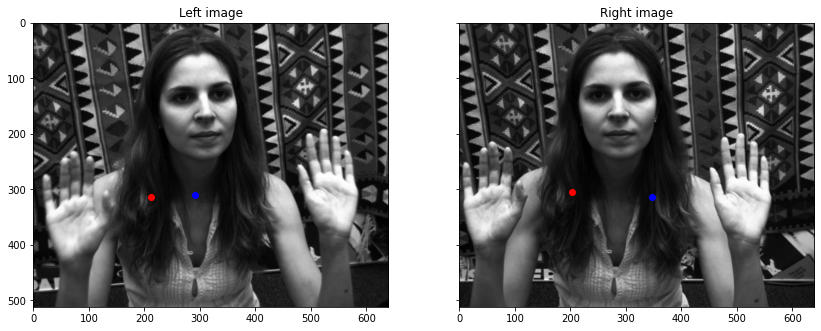

In [24]:
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image'), ax1.scatter(pL[0], pL[1], color='r'), \
    ax1.scatter(qL[0],qL[1], color = 'b')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image'), ax2.scatter(pR[0], pR[1], color = 'r'), \
    ax2.scatter(qR[0],qR[1], color = 'b');

**Answer Question:**\
Look at the projection of each of the points in the two images. One pair looks as expected, and the other does not. Please give a short explanation of what may have caused it.

**Your answer:** By saying that the blue dot doesn't behave as expected, we're ignoring the depth aspect of the image. The real object could be behind the girl's hair.

## Part B: Epipolar Geometry
Compute the fundamental matrix F and the epipoles eL and eR of the left and right images, using their projection matrices.
Note, you should normalize F by F(3,3) for improved precision.

For the epipoles' computation use the MR and ML and the Center of projections.

**Answer Quesion:**
Can you double check if they are correct using F? If so, check it.


In [25]:
(ML @ np.append(CR, 1).T / (ML @ np.append(CR, 1).T)[2])[:-1]
proj(MR, CL)

array([-13907.99596273,  -1240.26006697])

In [26]:
eL = proj(ML, CR)
eR = proj(MR, CL)

In [27]:
e_cross = np.zeros((3,3))
e_cross[0,1] = -1
e_cross[0,2] = eR[1]
e_cross[1,0] = 1
e_cross[1,2] = -eR[0]
e_cross[2,0] = -eR[1]
e_cross[2,1] = eR[0]
e_cross

array([[     0.        ,     -1.        ,  -1240.26006697],
       [     1.        ,      0.        ,  13907.99596273],
       [  1240.26006697, -13907.99596273,      0.        ]])

In [28]:
F = e_cross @ MR @ np.linalg.pinv(ML)
F /= F[2,2]
F

array([[ 0.00000075, -0.0000062 , -0.00777248],
       [-0.00000459,  0.0000007 ,  0.08796507],
       [ 0.00477065, -0.08530944,  1.        ]])

Let us double check $F$ by checking if we get:
$$\tilde{e}_{R}^{T}F=F\tilde{e}_L=0$$

In [29]:
F @ np.append(eL, 1)

array([ 0., -0.,  0.])

In [30]:
np.append(eR, 1).T @ F

array([-0.,  0.,  0.])

Also, note that the right null space of $F$ is $\tilde{e}_L$ and the left null space of $F$ is $\tilde{e}_R$

In [31]:
print((null_space(F) / null_space(F)[2])[:-1], '\n')
print((null_space(F.T) / null_space(F.T)[2])[:-1], '\n')
print(eL, '\n')
print(eR)

[[19334.33412499]
 [ 1092.93057043]] 

[[-13907.99596273]
 [ -1240.26006697]] 

[19334.33412498  1092.93057043] 

[-13907.99596273  -1240.26006697]


## Epipolar lines ##

Click on three different points of the **right** image, and check if the epipolar lines on the left image pass through a pixel that corresponds to the one you picked in the right image. Output the set of epipolar lines overlayed on the pair of  images as shown below.

To do so you can use:
1. The code below opens the images in a seperate window. You can click on the right image and  capture the click's coordinates by using the function *plt.ginput*.
2. Take each point (this can be done by a loop) and calculate its epipolar line  on the left image using F.
3. Compute the two endpoints of the line in the image to plot it on the left image. \
    **Hint**: you have linear coefficients - (a,b,c). Calculate the y value in the image for x=0, and x=image.width and plot the result.\
    Use: ax2.plot((x0. xWidth),(yx0, yxWidth))
4. Use the set of the points of the right image that you collected, and draw the epipolar lines on the right image.

**Answer** - For the left epipolar line, we just calculate:
$$\tilde{\ell}_L=\tilde{p}_R^T F$$
For the right epipolar line, we can use the fact that $e_R$ should be on it. Thus, the right epipolar line can be calculated using:
$$\tilde{\ell}_R=\tilde{e}_R\times \tilde{p}_R$$

In [32]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib qt 

imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

data = plt.ginput(3)

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')

for x in data:
    line_L = np.append(x, 1).reshape(3,1).T @ F
    line_R = np.cross(np.append(eR, 1).reshape(1,3), np.append(np.array([x]),1))
    
    x0_L = -line_L[:,2] / line_L[:,1]
    xy_L = (-line_L[:,2] - imL.shape[1] * line_L[:,0]) / line_L[:,1]
    x0_R = -line_R[:,2] / line_R[:,1]
    xy_R = (-line_R[:,2] - imL.shape[1] * line_R[:,0]) / line_R[:,1]
    ax1.plot((0, imL.shape[1]), (x0_L, xy_L))
    ax2.plot((0, imR.shape[1]), (x0_R, xy_R))

In [33]:
%matplotlib inline

### This is what you should see:
![Epipolar](epipolarLines1.png "Epipolar Lines example")

## Part C : SIFT and RANSAC/LMedS
**Follow the matching to compute F.**

https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html 

The example attached here needs some twicks to make it work. First you need to uninstall the opencv package and to install to opencv-contrib package:
- pip uninstall opencv-python 

Then install the contrib version with this:
- pip install opencv-contrib-python

**<span style="color:red"> Now, you have to use those lines:**
- **sift = cv2.xfeatures2d.SIFT_create()**
- **kp1, des1 = sift.detectAndCompute(img1, None)**


Hereby, we will find the corresponding featues using the SIFT algorithm and match the closet points. The plotted figure showes the best 300 matches.


(<matplotlib.image.AxesImage at 0x1ac2538c4c0>, Text(0.5, 1.0, 'Matches'))

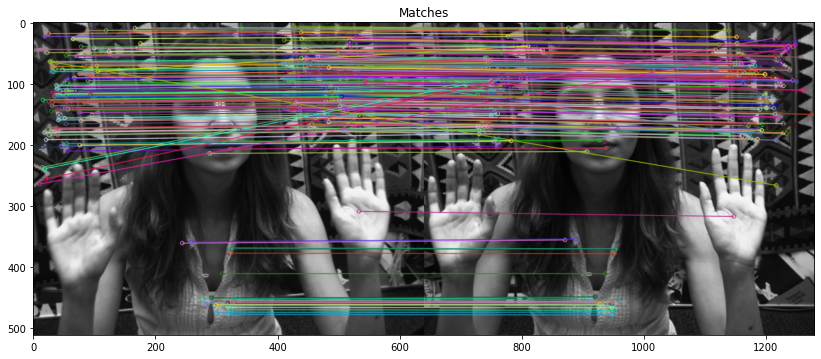

In [34]:
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
        
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:300], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

Not for submission: Look at the obtain results.

    a. Do you think all matches are correct?
    b. In which regions of the scene, most of the reliable matches were found?
    c. Tru the worst 200 mathces as well -- matching[-1-200:]

Now, we will use the found matches to compute **F** using *cv2.findFundamentalMat()*.

In [35]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [36]:
print(F_calc, '\n')
print(F)

[[ 0.00000127  0.00000744 -0.00916531]
 [-0.00001412  0.00000078  0.05895391]
 [ 0.00687814 -0.05827703  1.        ]] 

[[ 0.00000075 -0.0000062  -0.00777248]
 [-0.00000459  0.0000007   0.08796507]
 [ 0.00477065 -0.08530944  1.        ]]


And now lets check the computed F_calc:
1. Use it to draw the epipolar line as in the example above (change F to F_calc.T)
2. Compute the distance between the computed epipoles by F and by F_calc in each of the images.

Hint: You can use scipy.linalg import null_space 

In [37]:
eL_calc = (null_space(F_calc) / null_space(F_calc)[2])[:-1]
np.sqrt(((eL_calc - eL.reshape(2,1))**2).sum())

15141.734781647472

### Your part in this section :) ###

#### Take two images by your camera and compute the epipolar geometry using LMedS ####

Please submit in the pdf file: 5 corresponding epipolar lines overlayed on   your pair of images.

In [38]:
imL = cv2.imread('imgL.jpg', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('imgR.jpg', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)

In [39]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [40]:
# Setting the epipoles
eL_calc = (null_space(F_calc.T) /  null_space(F_calc.T)[2])
eR_calc = (null_space(F_calc) /  null_space(F_calc)[2])

In [ ]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib qt 

imL = cv2.imread('imgL.jpg', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('imgR.jpg', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

data = plt.ginput(3)

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')

for x in data:
    line_L = np.append(x, 1).reshape(3,1).T @ F_calc
    line_R = np.cross(eR_calc.T, np.append(np.array([x]),1))
    
    x0_L = -line_L[:,2] / line_L[:,1]
    xy_L = (-line_L[:,2] - imL.shape[1] * line_L[:,0]) / line_L[:,1]
    x0_R = -line_R[:,2] / line_R[:,1]
    xy_R = (-line_R[:,2] - imR.shape[1] * line_R[:,0]) / line_R[:,1]
    ax1.plot((0, imL.shape[1]), (x0_L, xy_L))
    ax2.plot((0, imR.shape[1]), (x0_R, xy_R))

In [42]:
%matplotlib inline


## Part D1 ##

In this part you will compute the 3D structure from a pair of rectified images, using three variants of a simple stereo  algorithm on rectified images, $A1$, $A2$, and $A3$ where:
- **$A1$** is an algorithm that computes the max similarity between two patches (without any attention for order or order-preservation) using cross correlation.
- **$A2$** is an algorithm that computes the max similarity (as $A2$), but with order-preserving.
- **$A3$** is an algorithm that computes the max similarity with order-preserving (as $A2$) but now, instead of using the intensity, we will use the magnitude of the gradients (As in Ex1).


**The input:**\
    **a.** A pair of two rectified images, $im1$ and $im2$ (*view1.png and view5.png*).\
    **b.** A window size $(s_x,s_y$).\
    **c.** Disparity range $(d_{min},d_{max})$ (see below).

**The output:**\
**a.** A matrix, $D$ with the disparity map for the left image.\
**b.** Three matrices X, Y, Z with the x, y, z coordinates of each pixel in the left image. Assign zero for pixels for which the disparity was not computed.

Note: all matrices $im1, im2, D, X, Y, Z$ have the same dimensions.

**Instructions:**
1. Read the two images view1.png and view5.png.
   The image planes are co-planar. The distance between the cameras is 160mm.
   
2. Write an algorithm that receives two rectified images (coplanar and parallel to the line connecting the two COP, with the same focal length), and compute a naive disparity along corresponding epipolar lines, using similarity measure for matching.
 1. The similarity of two $s_x\times s_y$ patches should be computed using normalized cross correlation of their vector descriptors. Cross correlation of two vectors $v_1$ and $v_2$ is  defined by: $$\frac{v_1⋅v_2}{‖v_1 ‖‖v_2 ‖}.$$ \
    For example, the descriptor $v_1$ can be ab $3\times 3$ patch around a pixel $(i,j)$ by reshape the $3\times 3$ patch around the pixel to a vector. You can use the reshape function:  $$v_1 = im1[i-1:i+1,j-1:j+1].reshape(1,9)$$.
    
    Notes: 
    - For $A1$ and $A2$ versions of the algorithm,  the descriptor is defined to be the grey-level values of the patch. For $A3$ version, the descriptor is defined as the set of magnitudes of the gradients in each pixel in the patch.
    - In case you use vectorized implementation, which is briefly discussed below, you do not need the reshape function. 
    
 2. For a naive disparity (version $A1$ of the algorithm), find for each patch in $im1$ the patch with the highest similarity   along the corresponding epipolar line in $im2$.\
    For order-preserving computation of the disparity (versions $A2$ and $A3$ of the algorithm) choose the corresponding patched such the order of matching is preserved.\
Note: you can assume that you are given the range of disparities, $d_{min},d_{max}$ as an input. For example, if $(d_{min},d_{max})=(20,120)$ it follows that you search for $(x,y)$ in the left image, its corresponding patch in the range $(x-120:x-20,y)$.
   
 3. Apply your functions to view1.png and view5.png, and display the disparity $D$ map as an image. 
   
3. Compute the depth map using the disparity. Add to your disparity depth map the value 100, since images were cropped. Note – simple triangulation can be applied here. Display it as an image. Assume that scaled focal lengths ($f$ in the presentation) are $α_x=α_y=1$.

4. Compute the matrices X,Y,Z - and present them as a 3D plot.


**Implementation**\
You can implement the computation of the similarity and the disparity directly by an exhaustive search. However, it will take a long time to run. Full credit will be given to a vectorized solution, as was briefly discussed in class.

General idea for the **vectorized solution** (you will need to fill in the gaps):
* Let $w$ and $h$ we the width and the height of the image respectively.
* First assume that the patch size is $1\times s_y$.
* Given two $1\times w$ rows, $r_1$ and $r_2$ which are corresponding rows of the two images. Compute the $w\times w$ matrix $R12=r_1^T r_2$. The values $R12(i,j)$ consists of the product of two pixels $r_1(i)\cdot r_2(j)$.
* Convolve $R12$ with the $s_y\times s_y$ identity matrix (used as a convolution mask): $Corr=I_{s_y}*R12$. The value $Corr(i,j)$ is the correlation of the $s_y$ 1D neighborhood of $r_1(i)$ and  $r_2(j)$.
* Think about how to normalize this correlation using the same idea. Hint, use the computation of $I_{s_y}*(r_1^Tr_1)$ and $I_{s_y}*(r_2^Tr_2)$.
* For a general patch size, $s_x\times s_y$, define $R$ to be 3D matrix of size $h\times w\times s_x$ and use 3D mask for the convolution.
* Up to here, we considered each row seperately, hence we need to loop over all rows of the images. You can further improve the computation time by computing directly the $h\times w\times w$ matrix, $R_{all}$, for all rows simultanouesly. In this case $R_{all}(i,j,k)$ consists of $im1(i,j)\cdot im2(i,k)$. See an example in ex2_example_vectorizing.ipynb of how to implement it in python.


In [43]:
from scipy.signal import convolve2d, convolve
import cv2
from time import perf_counter

In [44]:
def Grad_x(img, l=3):
    
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, _ = np.meshgrid(ax, ax)
    resultConv = convolve2d(img, xx, mode='same')
    return resultConv 

def Grad_y(img, l=3):
    
    ay = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    _, yy = np.meshgrid(ay, ay)
    resultConv = convolve2d(img, yy, mode='same')
    return resultConv 

def Grad_m(Ix, Iy):
    """
    compute the magnitude of each pixel
    """
    magnitude = np.sqrt(Ix**2+Iy**2)
    return magnitude #return G_magnitude

def img_grad(img, l=3):
    Ix = Grad_x(img, l=l)
    Iy = Grad_y(img, l=l)
    Im = Grad_m(Ix, Iy)
    return Im

In [46]:
def cross_corr(im1, im2, sx=3, sy=3, d_min=0, d_max=0):
 
    im1 = im1.astype(float)
    im2 = im2.astype(float)
    height_1, width_1 = im1.shape
    height_2, width_2 = im2.shape
    tensor = np.expand_dims(im1, 2) @ np.expand_dims(im2, 1)

    ker = np.zeros((sx,sy,sy))
    ker += np.eye(sx,sy)
    products = convolve(tensor, ker, mode='same')    
    
    im1_s = np.expand_dims(im1, 2) @ np.expand_dims(im1, 1)
    im2_s = np.expand_dims(im2, 2) @ np.expand_dims(im2, 1)
    im1_norms = convolve(im1_s, ker, mode='same')
    im2_norms = convolve(im2_s, ker, mode='same')

    im1_mags = np.sqrt(np.expand_dims(np.diagonal(im1_norms, axis1=1, axis2=2), 2) + np.zeros_like(im1_s))
    im2_mags = np.sqrt(np.expand_dims(np.diagonal(im2_norms, axis1=1, axis2=2), 1) + np.zeros_like(im2_s))
    cross_corr = products / (im1_mags * im2_mags)
    
    # zero meaningless indices
    cross_corr[:sx//2] = 0; cross_corr[-(sx//2):] = 0
    cross_corr[:,:sy//2] = 0; cross_corr[:,-(sy//2):] = 0
    cross_corr[:,:,:sy//2] = 0; cross_corr[:,:,-(sy//2):] = 0
    
    if d_min or d_max:  # A2 algorithm
        mat = np.zeros_like(cross_corr, dtype=bool)
        for i in range(width_1):
            mat[:,i,max(sy,i-d_max):i+d_min] = True
        cross_corr[~mat] = 0
    return cross_corr

In [47]:
def a1_a2(im1, im2, sx=3, sy=3, d_min=0, d_max=0, T = 160):
    timer = perf_counter()
    corrs = cross_corr(im1, im2, sx, sy, d_min, d_max)
    correspondence = np.argmax(corrs, axis=2)
    indices = np.arange(im1.shape[1]) + np.zeros_like(im1)
    D = indices - correspondence
    z = T / (D+100)  # Add 100 to disparity map
    #  Ignore meaningless indices
    z[:sy//2] = np.nan; z[-(sy//2):] = np.nan
    z[:,:sy//2] = np.nan; z[:,-(sy//2):] = np.nan
    z[z==np.inf] = np.nan
    x = np.arange(im1.shape[1]).reshape(1,im1.shape[1]) + np.zeros_like(im1)
    y = np.arange(im1.shape[0]).reshape(im1.shape[0],1) + np.zeros_like(im1)

    print('done in', perf_counter() - timer, 'seconds')
    return D, x, y, z

In [48]:
def a3(im1, im2, sx=3, sy=3, d_min=0, d_max=0, T = 160):
    im1_g = img_grad(im1)
    im2_g = img_grad(im2)
    return a1_a2(im1_g, im2_g, sx, sy, d_min, d_max, T)

In [75]:
im1 = cv2.imread('view1.png', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('view5.png', cv2.IMREAD_GRAYSCALE)
im2.shape

(559, 700)

We begin by running the images on each of the algorithms

In [76]:
a1_res = a1_a2(im1, im2, 5, 5)
D1, x1, y1, z1 = a1_res

C:\Users\guypa\AppData\Local\Temp/ipykernel_1548/3756821896.py:7: RuntimeWarning: divide by zero encountered in true_divide
  z = T / (D+100)


done in 203.8731196 seconds


In [77]:
a2_res = a1_a2(im1, im2, 5, 5, 20, 120)
D2, x2, y2, z2, = a2_res

done in 195.15487669999993 seconds


In [78]:
a3_res = a3(im1, im2, 5, 5, 20, 120)
D3, x3, y3, z3 = a3_res

C:\Users\guypa\AppData\Local\Temp/ipykernel_1548/1956049873.py:18: RuntimeWarning: invalid value encountered in sqrt
  im1_mags = np.sqrt(np.expand_dims(np.diagonal(im1_norms, axis1=1, axis2=2), 2) + np.zeros_like(im1_s))
C:\Users\guypa\AppData\Local\Temp/ipykernel_1548/1956049873.py:19: RuntimeWarning: invalid value encountered in sqrt
  im2_mags = np.sqrt(np.expand_dims(np.diagonal(im2_norms, axis1=1, axis2=2), 1) + np.zeros_like(im2_s))


done in 276.80070810000007 seconds


Consider the following disparity maps:

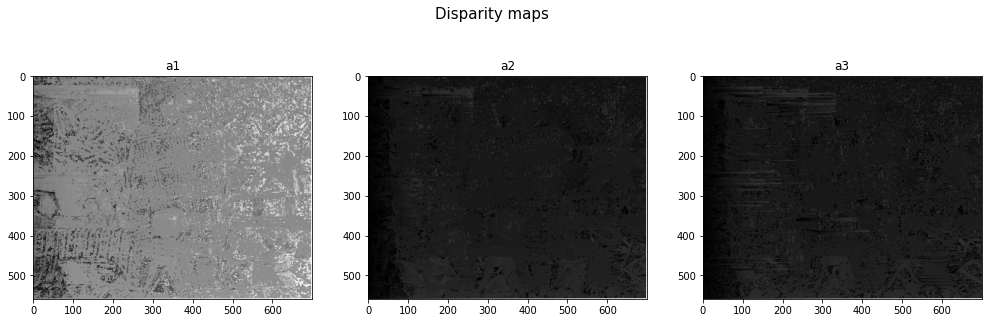

In [79]:
fig, ax = plt.subplots(1,3, figsize=(17,17))
ax[0].imshow(D1), ax[0].set_title('a1')
ax[1].imshow(D2), ax[1].set_title('a2')
ax[2].imshow(D3), ax[2].set_title('a3')
fig.suptitle('Disparity maps', y=0.65, size=15);

We continue by plotting the 3d mapping for all 3 algorithms 

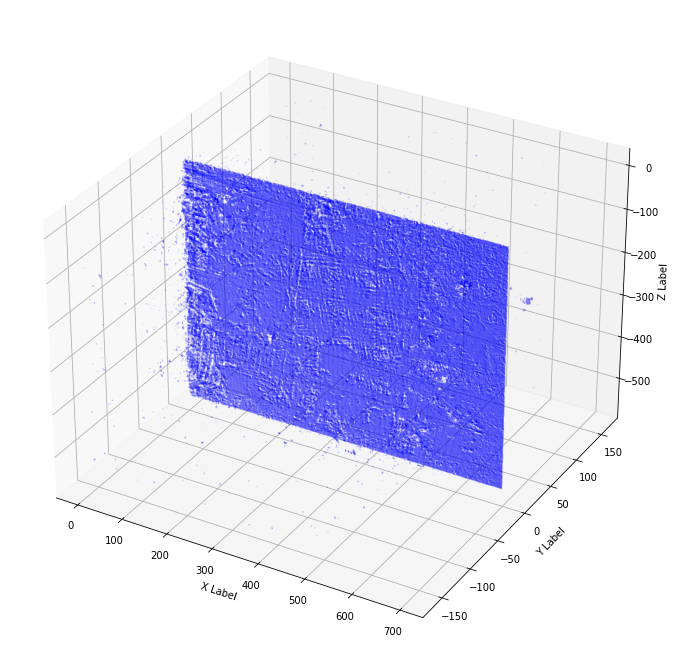

In [80]:
tst = z1 + 0
tst[tst==0] = np.nan
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,tst,-y1,color='blue', s=0.0071)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

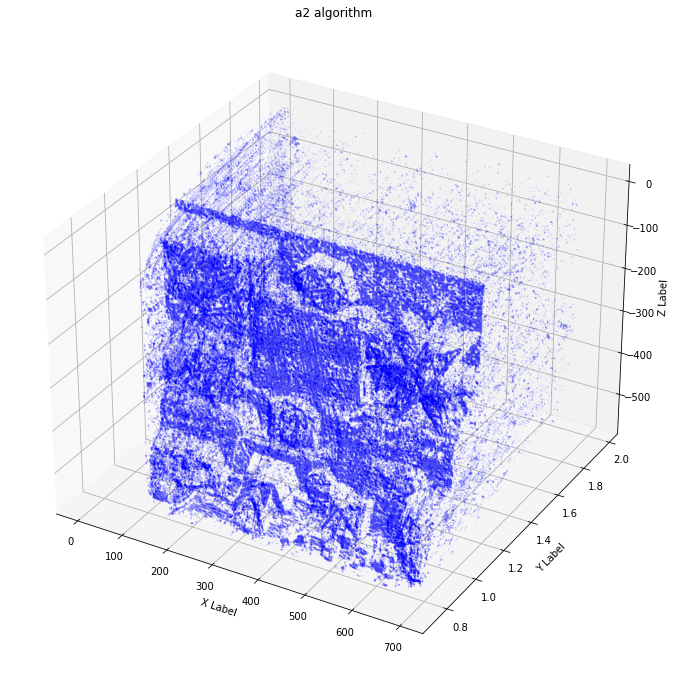

In [81]:
tst = z2 + 0
tst[tst==0] = np.nan
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2,tst,-y2,color='blue', s=0.0071)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('a2 algorithm');

Let us plot a2 again, but this time we remove some noise:

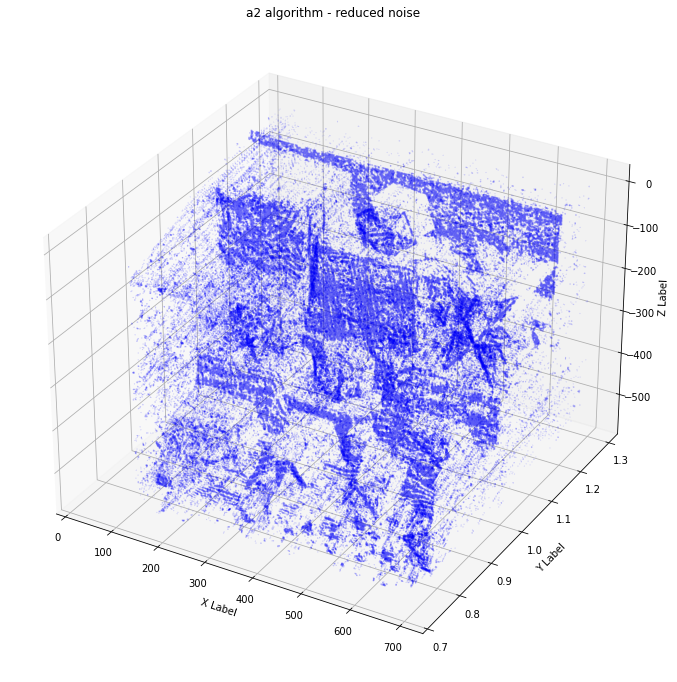

In [82]:
tst = z2 + 0
tst[tst>1.3] = np.nan
tst[tst==0] = np.nan
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2,tst,-y2,color='blue', s=0.0071)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('a2 algorithm - reduced noise');

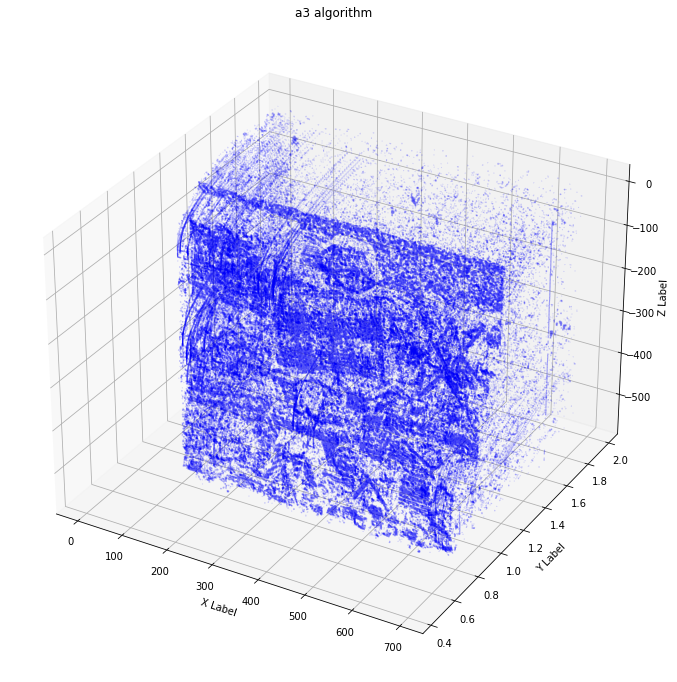

In [83]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3,z3,-y3,color='blue', s=0.0071)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('a3 algorithm');

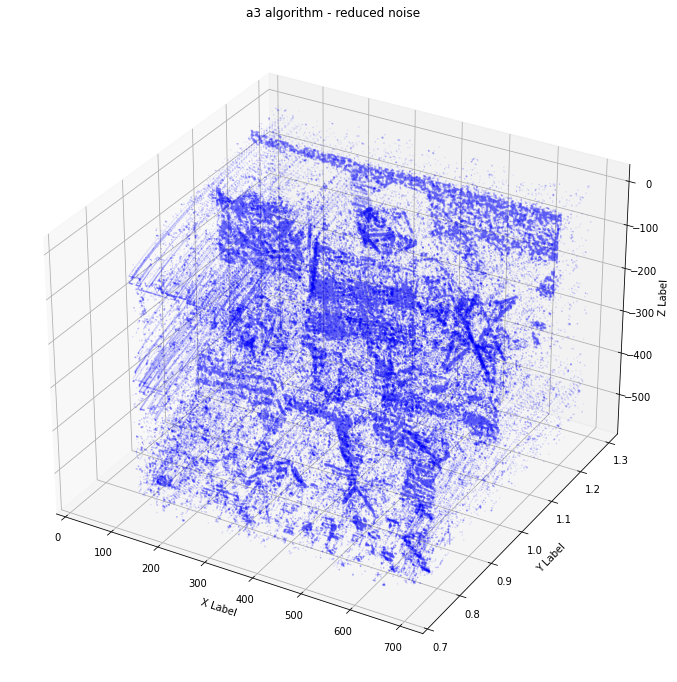

In [91]:
tst = z3 + 0
tst[tst>1.3] = np.nan
tst[tst<0.6] = np.nan
tst[tst==0] = np.nan
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3,tst,-y3,color='blue', s=0.0071)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('a3 algorithm - reduced noise');

## Part D2 

**Answer Questions:**
1. Suggest a method for quantitative evaluation of your results. (You do not need to implement it.)
2. What are the differences in the results of applying $A1$ and $A2$? Describe failure of one of them with respect to the other, if exists.
3.  What are the differences in the results of applying $A2$ and $A3$? Describe failure of one of them with respect to the other, if exists.
4. Which regions have more errors? Why?

BONUS: repeat D1 but use dynamic programing to compute an optimal order preserving disparity. Note, the data is already ready for the algorithm.

**Answer**
1. We can try and recreate one of the images, based on the other image and the computed disparity, and check if the result makes sense.
2. Algorithm $A1$ checks naively for matches in the entire row, it is possible to achieve higher correlation in absurd places because of random noise effects. This leads to higher disparity range, this is exactly why the 3d plot of $A1$ looks "far away" and not zoomed enough. $A2$ on the other hand, limits the search interval, which limits the disparity accordingly.
3. We would say that the magnitude may cause more similarity between edges by fading away some small details, which are negligible in terms of magnitudes but are crucial in terms of correlation matching in small intervals. It might seem that $A3$ algorithm produced less accurate results than $A2$. Could be image dependent though.
4. As the images are cropped, we expect to see many errors in that cropped interval. e.g the right image shows more details in its right side (see pictures below). These details can't be found in the left image, but our algorithm will pick a maximum point nevertheless.

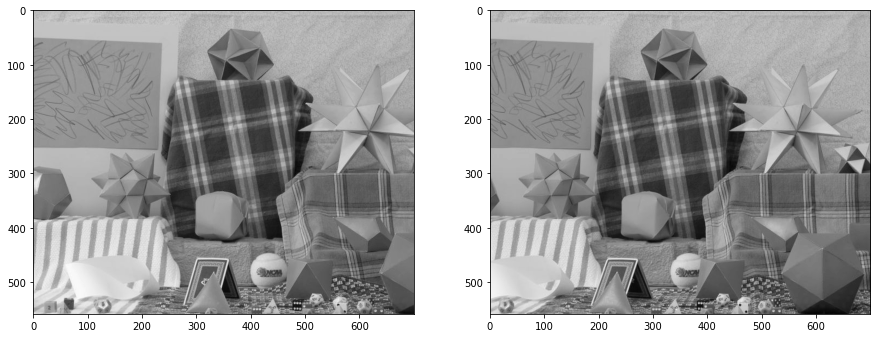

In [92]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(im1)
ax[1].imshow(im2);